In [11]:
!mkdir test

In [9]:
!mkdir data

In [2]:
import os
import shutil, glob
import pandas as pd
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt
import math

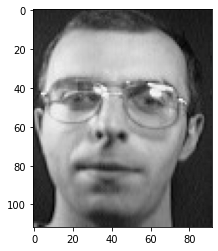

In [13]:
path_base= "Faces"
images_path= os.path.join("Faces")
images_names= os.listdir(images_path)
for jpgfile in glob.iglob(os.path.join("Faces", "*.jpg")):
    shutil.copy(jpgfile, "data")

tmp_img = cv.imread(f"{images_path}/{images_names[10]}",0)
plt.imshow(tmp_img,cmap="gray")


In [14]:
for i in images_names:
  if i.split(".")[0]=="1" :
    shutil.move(os.path.join("Faces", i), "test")
  

In [15]:
images=[]
for i in range(0,len(images_names)):
  img = cv.imread(f"{images_path}/{images_names[i]}",0)
  imgName = "s"+images_names[i].split("s")[1].split(".jpg")[0]
  images.append([imgName,f"{images_path}/{images_names[i]}",img])

s10


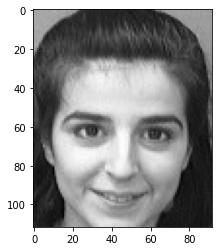

In [16]:
plt.imshow(images[41][2],cmap='gray')
print(images[41][0])

In [17]:
#pour binariser notre matrice:
def Pixel(img, avg, x, y):
    new_Val = 0
    try:
        if img[x][y] >= avg:
            new_Val = 1
    except:
        pass

    return new_Val

def Calculate_LBP(img, x, y):
    Avg=img[x][y]
    Val_arr = []
    #pour calculer l'average de la matrice 3x3:
    try:
        Avg_arr = [img[x - 1][y - 1], img[x - 1][y], img[x - 1][y + 1]
            , img[x][y - 1], img[x][y], img[x][y + 1]
            , img[x + 1][y - 1], img[x + 1][y], img[x + 1][y + 1]]
        Avg = int(sum(Avg_arr)/9)
    except:
        pass
    # en haut à gauche
    Val_arr.append(Pixel(img, Avg, x - 1, y - 1))
    # haut
    Val_arr.append(Pixel(img, Avg, x - 1, y))
    # en haut à droite
    Val_arr.append(Pixel(img, Avg, x - 1, y + 1))
    # droite
    Val_arr.append(Pixel(img, Avg, x, y + 1))
    # en bas à droite
    Val_arr.append(Pixel(img, Avg, x + 1, y + 1))
    # bas
    Val_arr.append(Pixel(img, Avg, x + 1, y))
    # en bas à gauche
    Val_arr.append(Pixel(img, Avg, x + 1, y - 1))
    # gauche
    Val_arr.append(Pixel(img, Avg, x, y - 1))

    Valf = 0
    val_power = [1, 2, 4, 8, 16, 32, 64, 128]
    #Pour calculer la valeur final qu'on va mettre dans notre nouveau image: 
    for i in range(len(Val_arr)):
        Valf += Val_arr[i] * val_power[i]

    return Valf

def albp(img):
  h,l= img.shape
  imgLbp = np.zeros((h,l)).astype('uint8')
  for i in range(0,h):
    for j in range(0,l):
        imgLbp[i,j] = Calculate_LBP(img,i,j)
  return imgLbp

In [18]:
images_albp=[]
for i in range(0,len(images)):
  img_albp = albp(images[i][2])
  images_albp.append([images[i][0],images[i][1],img_albp])

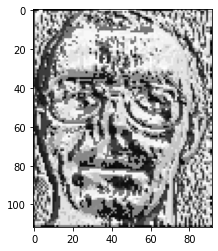

In [19]:
plt.imshow(images_albp[10][2],cmap='gray')

In [20]:
def histogram(img):
  hist= np.zeros((256)).astype('uint8')
  for i in range(256):
    hist[i]=(img==i).sum()
  hist = hist.tolist()  
  return hist


In [21]:
data_histo=[]
for i in range(0,len(images_albp)):
  histog = histogram(images_albp[i][2])
  data_histo.append([images_albp[i][0],images_albp[i][1],histog])

In [22]:
data_histo

[['s1',
  'Faces/10.pgms1.jpg',
  [19,
   4,
   8,
   9,
   0,
   0,
   5,
   96,
   6,
   0,
   1,
   4,
   9,
   4,
   77,
   65,
   0,
   1,
   0,
   1,
   0,
   3,
   2,
   27,
   9,
   2,
   11,
   26,
   143,
   50,
   102,
   85,
   8,
   3,
   15,
   11,
   0,
   2,
   5,
   22,
   0,
   0,
   4,
   6,
   9,
   13,
   48,
   40,
   6,
   3,
   17,
   21,
   4,
   1,
   16,
   26,
   60,
   23,
   60,
   36,
   121,
   36,
   191,
   117,
   2,
   0,
   2,
   6,
   0,
   0,
   4,
   15,
   0,
   1,
   0,
   3,
   3,
   0,
   32,
   17,
   1,
   3,
   4,
   1,
   2,
   4,
   2,
   4,
   4,
   5,
   9,
   6,
   42,
   12,
   54,
   15,
   6,
   4,
   14,
   18,
   2,
   2,
   13,
   14,
   3,
   4,
   4,
   5,
   10,
   4,
   26,
   6,
   73,
   25,
   30,
   27,
   27,
   7,
   31,
   36,
   48,
   25,
   49,
   17,
   227,
   10,
   97,
   27,
   11,
   12,
   0,
   64,
   2,
   5,
   4,
   168,
   6,
   7,
   2,
   11,
   7,
   15,
   28,
   41,
   1,
   6,
   3,
   16,
   0,
 

In [23]:
dataframe = pd.DataFrame(data_histo,columns=['name','path','histo'])

In [24]:
dataframe.head()

,name,path,histo
0,s1,Faces/10.pgms1.jpg,"[19, 4, 8, 9, 0, 0, 5, 96, 6, 0, 1, 4, 9, 4, 7..."
1,s10,Faces/10.pgms10.jpg,"[22, 1, 16, 13, 2, 2, 8, 148, 10, 0, 1, 2, 18,..."
2,s11,Faces/10.pgms11.jpg,"[21, 6, 18, 15, 8, 5, 14, 104, 1, 0, 5, 8, 16,..."
3,s12,Faces/10.pgms12.jpg,"[24, 1, 15, 12, 4, 2, 9, 93, 2, 1, 1, 8, 8, 5,..."
4,s13,Faces/10.pgms13.jpg,"[18, 1, 16, 15, 3, 6, 10, 90, 6, 3, 1, 6, 12, ..."


In [25]:
dataframe.to_excel("database.xlsx",index='false')

In [26]:
dataframe['histo'][0]

[19,
 4,
 8,
 9,
 0,
 0,
 5,
 96,
 6,
 0,
 1,
 4,
 9,
 4,
 77,
 65,
 0,
 1,
 0,
 1,
 0,
 3,
 2,
 27,
 9,
 2,
 11,
 26,
 143,
 50,
 102,
 85,
 8,
 3,
 15,
 11,
 0,
 2,
 5,
 22,
 0,
 0,
 4,
 6,
 9,
 13,
 48,
 40,
 6,
 3,
 17,
 21,
 4,
 1,
 16,
 26,
 60,
 23,
 60,
 36,
 121,
 36,
 191,
 117,
 2,
 0,
 2,
 6,
 0,
 0,
 4,
 15,
 0,
 1,
 0,
 3,
 3,
 0,
 32,
 17,
 1,
 3,
 4,
 1,
 2,
 4,
 2,
 4,
 4,
 5,
 9,
 6,
 42,
 12,
 54,
 15,
 6,
 4,
 14,
 18,
 2,
 2,
 13,
 14,
 3,
 4,
 4,
 5,
 10,
 4,
 26,
 6,
 73,
 25,
 30,
 27,
 27,
 7,
 31,
 36,
 48,
 25,
 49,
 17,
 227,
 10,
 97,
 27,
 11,
 12,
 0,
 64,
 2,
 5,
 4,
 168,
 6,
 7,
 2,
 11,
 7,
 15,
 28,
 41,
 1,
 6,
 3,
 16,
 0,
 4,
 2,
 15,
 7,
 12,
 8,
 24,
 19,
 41,
 34,
 106,
 5,
 13,
 1,
 37,
 0,
 7,
 4,
 29,
 1,
 3,
 1,
 5,
 6,
 18,
 7,
 34,
 9,
 22,
 10,
 21,
 0,
 2,
 14,
 13,
 27,
 27,
 15,
 22,
 28,
 18,
 25,
 39,
 4,
 197,
 4,
 245,
 5,
 25,
 12,
 132,
 7,
 14,
 2,
 17,
 17,
 38,
 20,
 79,
 3,
 37,
 6,
 30,
 2,
 9,
 2,
 11,
 13,
 41,
 16,
 20,


-------------

In [27]:
DataBase_xlsx=pd.read_excel('database.xlsx')

In [28]:
DataBase_xlsx.head()

,Unnamed: 0,name,path,histo
0,0,s1,Faces/10.pgms1.jpg,"[19, 4, 8, 9, 0, 0, 5, 96, 6, 0, 1, 4, 9, 4, 7..."
1,1,s10,Faces/10.pgms10.jpg,"[22, 1, 16, 13, 2, 2, 8, 148, 10, 0, 1, 2, 18,..."
2,2,s11,Faces/10.pgms11.jpg,"[21, 6, 18, 15, 8, 5, 14, 104, 1, 0, 5, 8, 16,..."
3,3,s12,Faces/10.pgms12.jpg,"[24, 1, 15, 12, 4, 2, 9, 93, 2, 1, 1, 8, 8, 5,..."
4,4,s13,Faces/10.pgms13.jpg,"[18, 1, 16, 15, 3, 6, 10, 90, 6, 3, 1, 6, 12, ..."


In [29]:
DataBase_xlsx['histo'][1]

'[22, 1, 16, 13, 2, 2, 8, 148, 10, 0, 1, 2, 18, 8, 52, 17, 0, 0, 2, 8, 0, 3, 2, 14, 6, 7, 13, 17, 164, 43, 122, 200, 12, 4, 16, 18, 3, 3, 17, 24, 0, 2, 3, 4, 9, 12, 50, 36, 7, 11, 10, 27, 5, 7, 20, 18, 54, 20, 57, 25, 76, 37, 30, 87, 1, 0, 3, 7, 3, 1, 6, 10, 1, 2, 2, 2, 5, 5, 21, 22, 0, 4, 9, 6, 2, 4, 8, 3, 6, 5, 17, 7, 39, 12, 39, 10, 9, 3, 18, 16, 6, 8, 21, 13, 3, 4, 5, 5, 10, 6, 17, 15, 162, 19, 38, 19, 17, 2, 10, 15, 20, 23, 42, 7, 175, 10, 98, 13, 11, 21, 2, 67, 0, 3, 0, 53, 5, 8, 1, 17, 6, 17, 11, 110, 0, 7, 0, 18, 1, 2, 3, 16, 0, 7, 4, 22, 10, 47, 18, 73, 1, 29, 2, 43, 2, 18, 9, 40, 0, 4, 3, 8, 5, 14, 6, 33, 5, 19, 7, 19, 4, 10, 4, 9, 11, 18, 15, 12, 14, 20, 23, 54, 2, 179, 11, 174, 8, 37, 12, 203, 5, 10, 7, 17, 12, 51, 21, 92, 6, 39, 9, 44, 4, 11, 2, 6, 13, 61, 17, 17, 52, 73, 27, 55, 73, 64, 62, 199, 29, 61, 16, 97, 13, 19, 16, 22, 21, 37, 17, 39, 25, 222, 33, 84, 17, 8, 5, 18, 198, 82, 40, 46, 94, 44, 47, 214]'

In [30]:
import ast 
DataBase_xlsx['histo'] = DataBase_xlsx['histo'].apply(ast.literal_eval)

In [31]:
DataBase_xlsx['histo'][0]

[19,
 4,
 8,
 9,
 0,
 0,
 5,
 96,
 6,
 0,
 1,
 4,
 9,
 4,
 77,
 65,
 0,
 1,
 0,
 1,
 0,
 3,
 2,
 27,
 9,
 2,
 11,
 26,
 143,
 50,
 102,
 85,
 8,
 3,
 15,
 11,
 0,
 2,
 5,
 22,
 0,
 0,
 4,
 6,
 9,
 13,
 48,
 40,
 6,
 3,
 17,
 21,
 4,
 1,
 16,
 26,
 60,
 23,
 60,
 36,
 121,
 36,
 191,
 117,
 2,
 0,
 2,
 6,
 0,
 0,
 4,
 15,
 0,
 1,
 0,
 3,
 3,
 0,
 32,
 17,
 1,
 3,
 4,
 1,
 2,
 4,
 2,
 4,
 4,
 5,
 9,
 6,
 42,
 12,
 54,
 15,
 6,
 4,
 14,
 18,
 2,
 2,
 13,
 14,
 3,
 4,
 4,
 5,
 10,
 4,
 26,
 6,
 73,
 25,
 30,
 27,
 27,
 7,
 31,
 36,
 48,
 25,
 49,
 17,
 227,
 10,
 97,
 27,
 11,
 12,
 0,
 64,
 2,
 5,
 4,
 168,
 6,
 7,
 2,
 11,
 7,
 15,
 28,
 41,
 1,
 6,
 3,
 16,
 0,
 4,
 2,
 15,
 7,
 12,
 8,
 24,
 19,
 41,
 34,
 106,
 5,
 13,
 1,
 37,
 0,
 7,
 4,
 29,
 1,
 3,
 1,
 5,
 6,
 18,
 7,
 34,
 9,
 22,
 10,
 21,
 0,
 2,
 14,
 13,
 27,
 27,
 15,
 22,
 28,
 18,
 25,
 39,
 4,
 197,
 4,
 245,
 5,
 25,
 12,
 132,
 7,
 14,
 2,
 17,
 17,
 38,
 20,
 79,
 3,
 37,
 6,
 30,
 2,
 9,
 2,
 11,
 13,
 41,
 16,
 20,


In [32]:
def distance_ec(histo1,histo2):
  sum=0

  for i in range(len(histo1)):
    sum+=((histo1[i]-histo2[i])*(histo1[i]-histo2[i]))
  distance= math.sqrt(sum)
  return distance

In [33]:
distance_ec(DataBase_xlsx['histo'][4],DataBase_xlsx['histo'][0])

395.9494917284274

In [43]:
def K_NN(request,database,K):
  array_dis=[]
  for i in range(len(database)):
    array_dis.append([DataBase_xlsx['name'][i],DataBase_xlsx['path'][i],distance_ec(DataBase_xlsx['histo'][i], request[2])])
  array_dis= np.array(array_dis)
  sorted_array = array_dis[np.argsort(array_dis[:, 2])]
  near=[]
  for i in range(K):
    near.append(sorted_array[i][0])
  result = {}
  for i in near:
    if i not in result:
      result[i] = 1
    else:
      result[i] += 1
      
  result= dict(sorted(result.items(), key=lambda item: item[1], reverse=True))

  dictlist= []
  for key, value in result.items():
      temp = [key,value]
      dictlist.append(temp)
  Myclass = []
  Accuracy = 0.0
  if  request[0] in result:
    Myclass.append(request[0])
    Accuracy = (int(result[request[0]])/K)*100
    if Accuracy== 200.0:
      Accuracy = 100.0
  else:
    Myclass.append(request[0])  

  return result,sorted_array[:K][:],dictlist[0], Myclass[0],Accuracy

In [44]:
def Testing(name,path):
  img = cv.imread(path+"/"+name,0)
  img_albp=albp(img)
  img_histo=histogram(img_albp)
  name_person= "s"+name.split("s")[1].split(".jpg")[0]
  return [name_person,path+"/"+name,img_histo, img]


In [47]:
request = Testing('1.pgms22.jpg','test')
results,Arr, BestScore,myclass,Accuracy =K_NN(request,DataBase_xlsx,9)
results

{'s22': 3, 's20': 2, 's39': 1, 's36': 1, 's33': 1, 's17': 1}

In [48]:
print(results)
print(Arr)
print(myclass)
print(Accuracy)

BestScore

{'s22': 3, 's20': 2, 's39': 1, 's36': 1, 's33': 1, 's17': 1}
[['s20' 'Faces/3.pgms20.jpg' '257.2353008434107']
 ['s39' 'Faces/7.pgms39.jpg' '257.5228145232962']
 ['s22' 'Faces/3.pgms22.jpg' '265.4731624854008']
 ['s22' 'Faces/7.pgms22.jpg' '267.20029940102984']
 ['s22' 'Faces/5.pgms22.jpg' '269.60341244131166']
 ['s36' 'Faces/7.pgms36.jpg' '302.65491900843114']
 ['s33' 'Faces/3.pgms33.jpg' '303.2094985319556']
 ['s20' 'Faces/4.pgms20.jpg' '312.84500954945725']
 ['s17' 'Faces/3.pgms17.jpg' '313.6718030043504']]
s22
33.33333333333333


['s22', 3]

In [49]:
images_path_test= os.path.join("test")
images_names_test= os.listdir(images_path_test)

In [50]:
KNN_score= []
Requests = []
KNN_global= []
for i in range(0,len(images_names_test)):
    k=0
    request= Testing(f"{images_names_test[i]}",images_path_test)
    Requests.append(request)
    for k in range(1,10):
        if k%2!=0:
            results,ArrInfo, BestScore,myclass,Accuracy = K_NN(request,DataBase_xlsx,k)
            KNN_score.append([myclass,Accuracy, k])    
    KNN_global.append(KNN_score)

In [107]:
KNN_score

[['s1', 0.0, 1],
 ['s1', 33.33333333333333, 3],
 ['s1', 20.0, 5],
 ['s1', 14.285714285714285, 7],
 ['s1', 11.11111111111111, 9],
 ['s10', 100.0, 1],
 ['s10', 33.33333333333333, 3],
 ['s10', 20.0, 5],
 ['s10', 28.57142857142857, 7],
 ['s10', 22.22222222222222, 9],
 ['s11', 100.0, 1],
 ['s11', 33.33333333333333, 3],
 ['s11', 40.0, 5],
 ['s11', 42.857142857142854, 7],
 ['s11', 33.33333333333333, 9],
 ['s12', 0.0, 1],
 ['s12', 33.33333333333333, 3],
 ['s12', 20.0, 5],
 ['s12', 28.57142857142857, 7],
 ['s12', 22.22222222222222, 9],
 ['s13', 0.0, 1],
 ['s13', 33.33333333333333, 3],
 ['s13', 20.0, 5],
 ['s13', 14.285714285714285, 7],
 ['s13', 11.11111111111111, 9],
 ['s14', 100.0, 1],
 ['s14', 66.66666666666666, 3],
 ['s14', 80.0, 5],
 ['s14', 71.42857142857143, 7],
 ['s14', 66.66666666666666, 9],
 ['s15', 0.0, 1],
 ['s15', 0.0, 3],
 ['s15', 0.0, 5],
 ['s15', 0.0, 7],
 ['s15', 11.11111111111111, 9],
 ['s16', 0.0, 1],
 ['s16', 0.0, 3],
 ['s16', 20.0, 5],
 ['s16', 14.285714285714285, 7],
 ['s16

In [89]:
names = []
result = []
imgNum=[]
for i in range(1,len(images_names_test)+1):
    names.append(f's{i}')

for i in range(0,len(names)):
    imgNum=[]
    for j in range(0,len(KNN_score)):    
        if names[i]==KNN_score[j][0]:
            imgNum.append(KNN_score[j][1])
    result.append(imgNum)    
                            
result

[[0.0, 33.33333333333333, 20.0, 14.285714285714285, 11.11111111111111],
 [100.0, 100.0, 80.0, 71.42857142857143, 55.55555555555556],
 [0.0, 0.0, 40.0, 42.857142857142854, 33.33333333333333],
 [100.0, 33.33333333333333, 20.0, 14.285714285714285, 11.11111111111111],
 [0.0, 33.33333333333333, 40.0, 28.57142857142857, 33.33333333333333],
 [100.0, 33.33333333333333, 20.0, 14.285714285714285, 11.11111111111111],
 [100.0, 100.0, 60.0, 57.14285714285714, 66.66666666666666],
 [100.0, 100.0, 80.0, 71.42857142857143, 55.55555555555556],
 [100.0, 33.33333333333333, 20.0, 28.57142857142857, 33.33333333333333],
 [100.0, 33.33333333333333, 20.0, 28.57142857142857, 22.22222222222222],
 [100.0, 33.33333333333333, 40.0, 42.857142857142854, 33.33333333333333],
 [0.0, 33.33333333333333, 20.0, 28.57142857142857, 22.22222222222222],
 [0.0, 33.33333333333333, 20.0, 14.285714285714285, 11.11111111111111],
 [100.0, 66.66666666666666, 80.0, 71.42857142857143, 66.66666666666666],
 [0.0, 0.0, 0.0, 0.0, 11.1111111

C:\Users\test\AppData\Local\Temp/ipykernel_24228/913948494.py:6: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure()


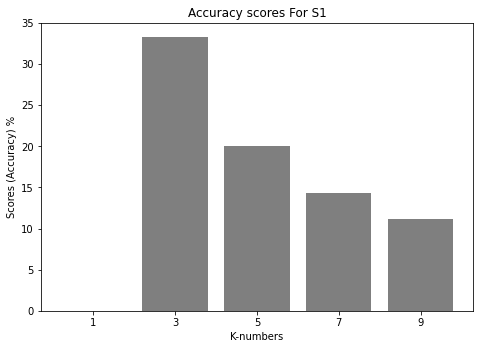

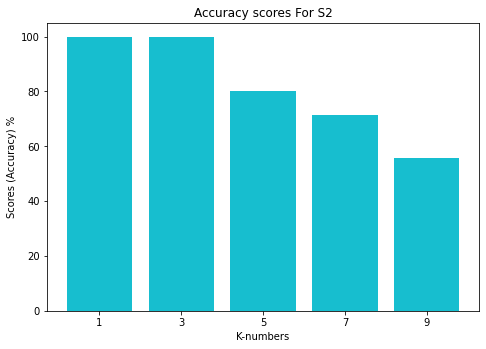

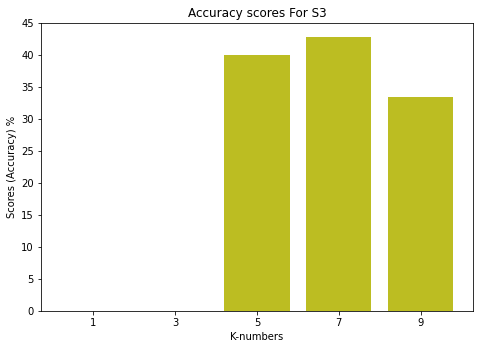

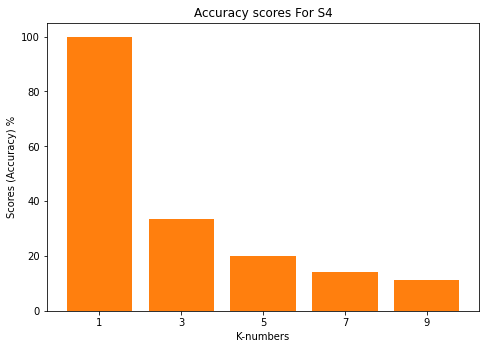

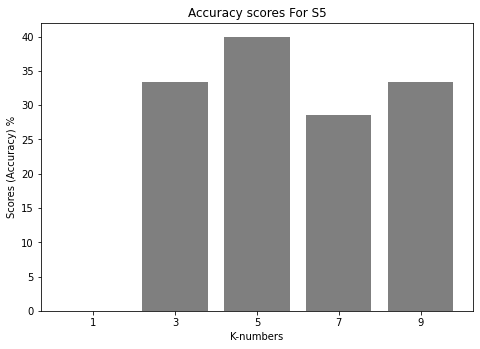

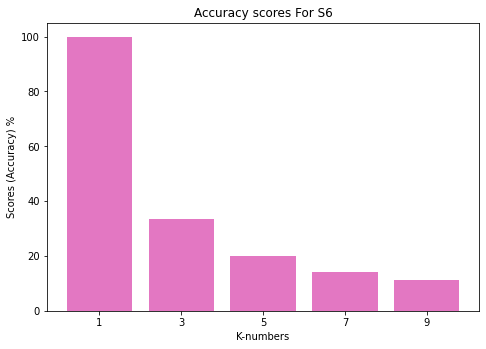

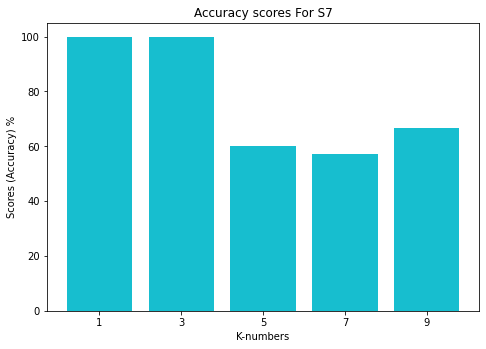

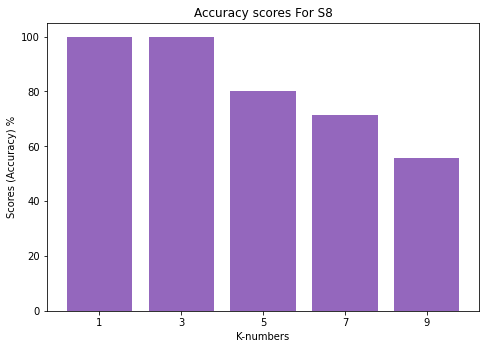

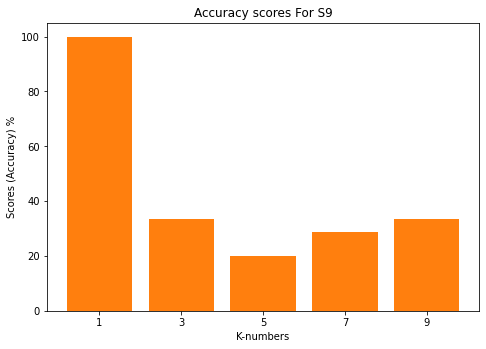

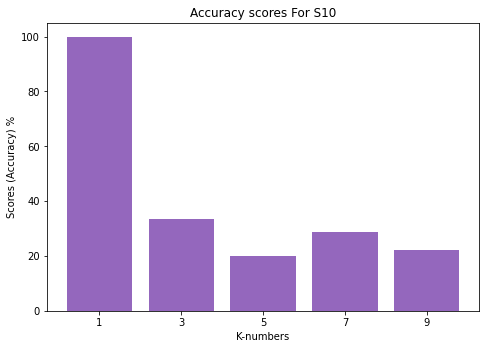

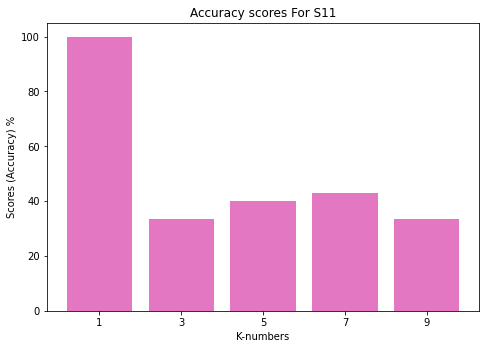

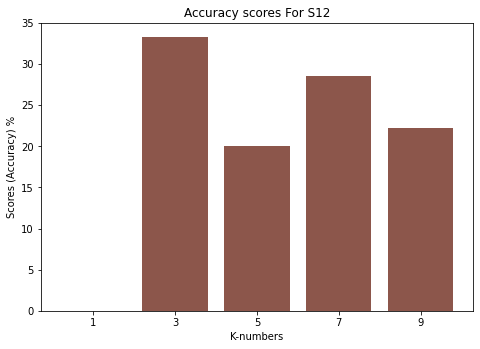

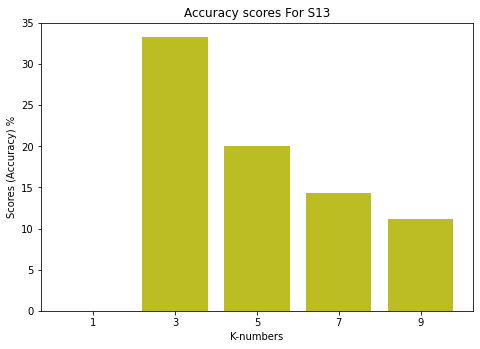

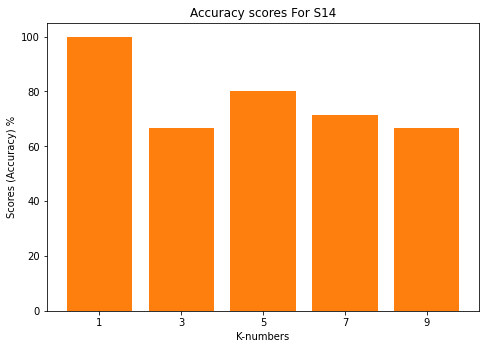

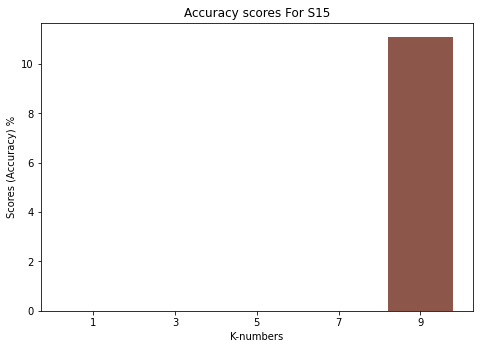

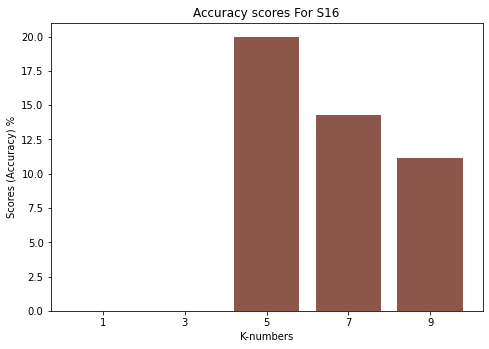

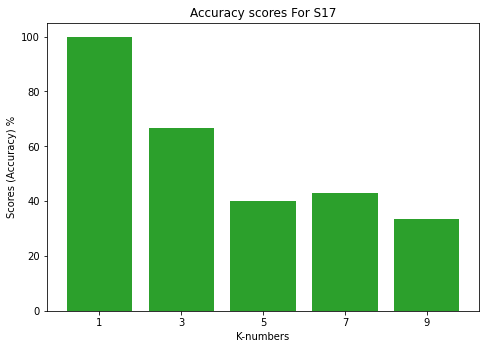

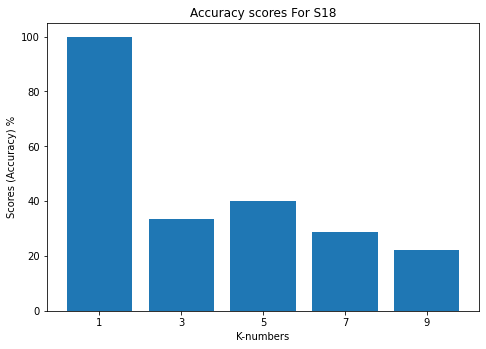

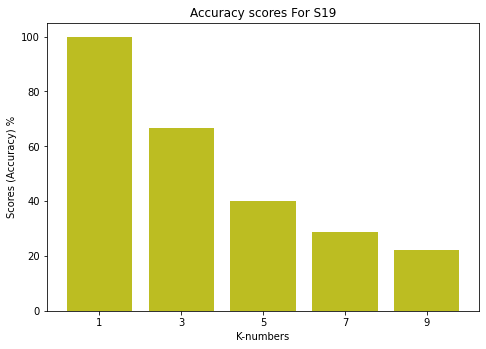

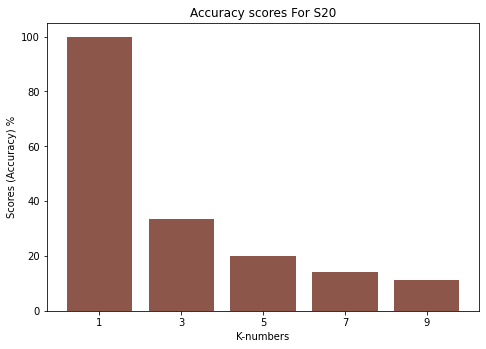

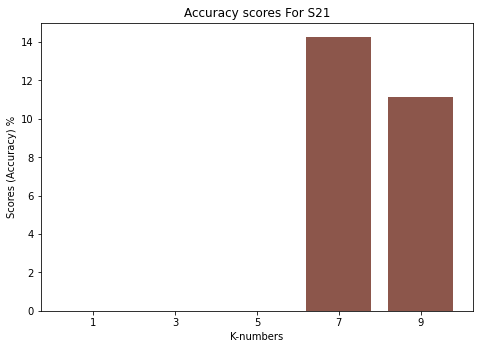

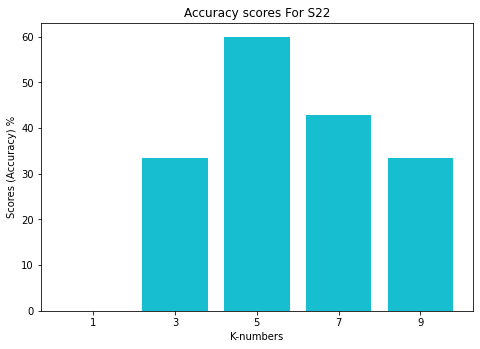

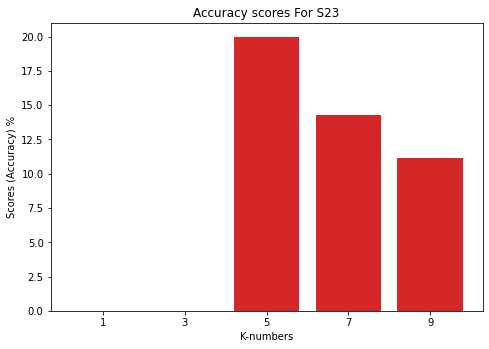

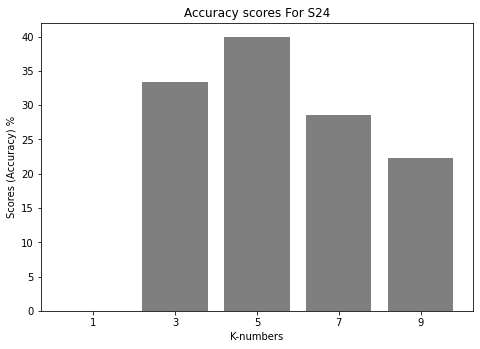

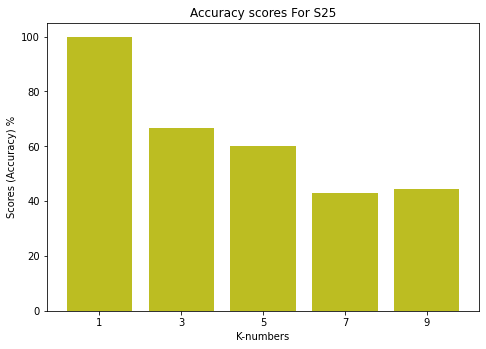

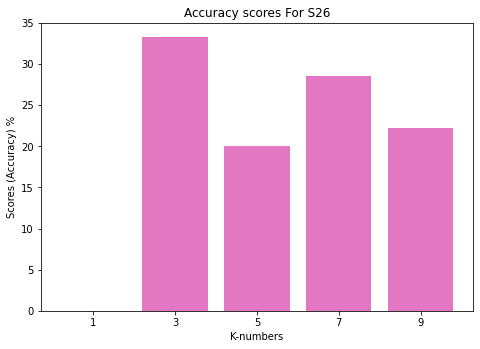

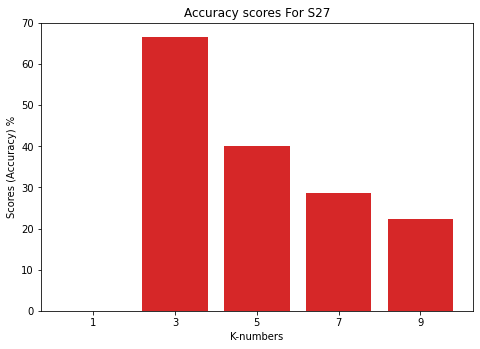

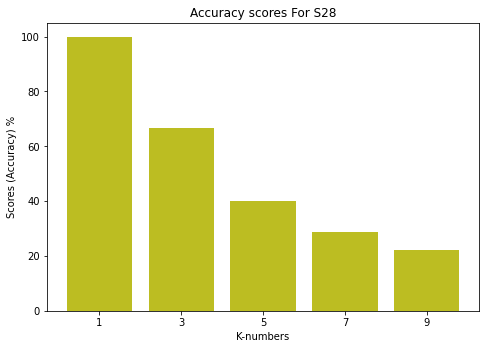

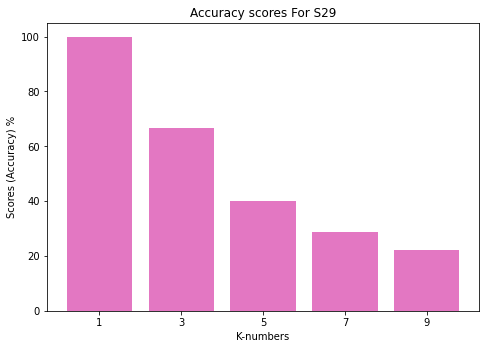

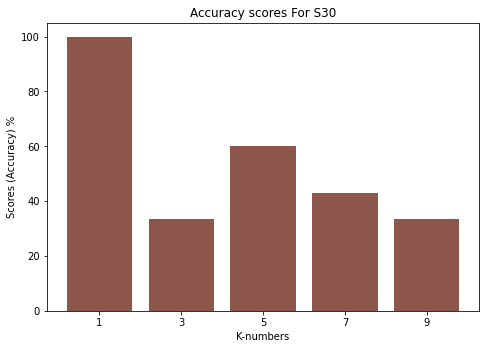

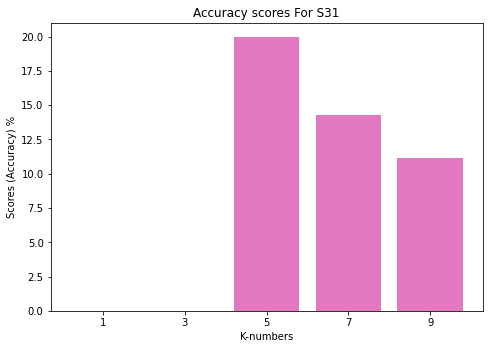

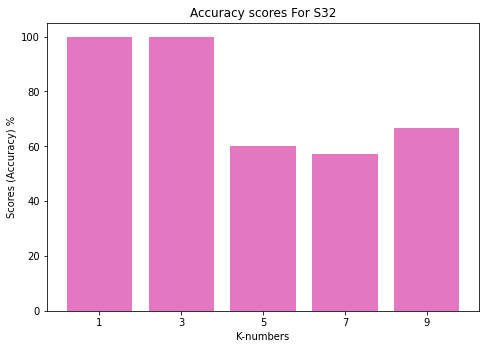

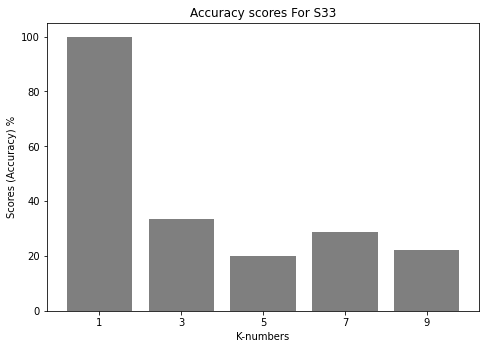

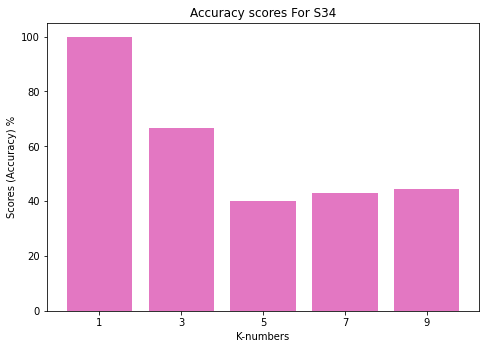

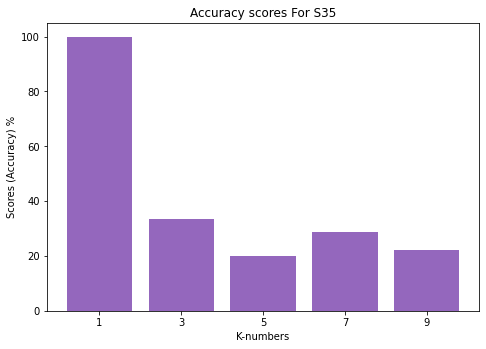

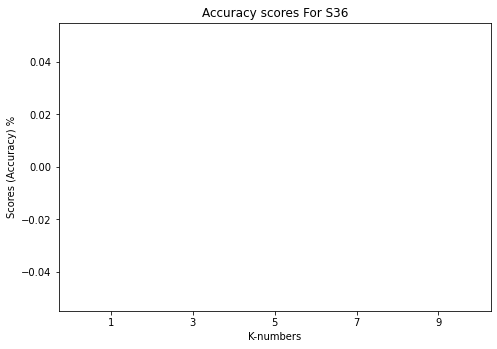

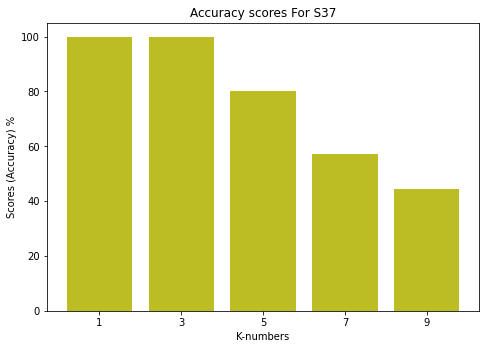

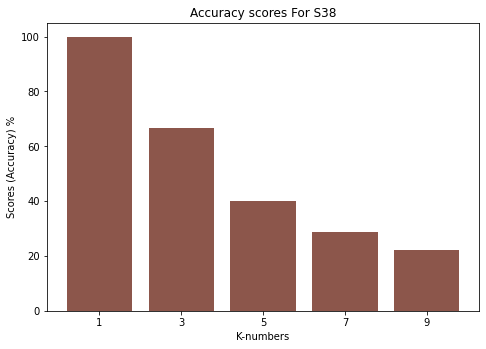

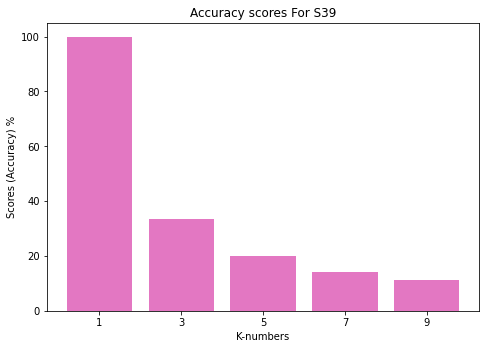

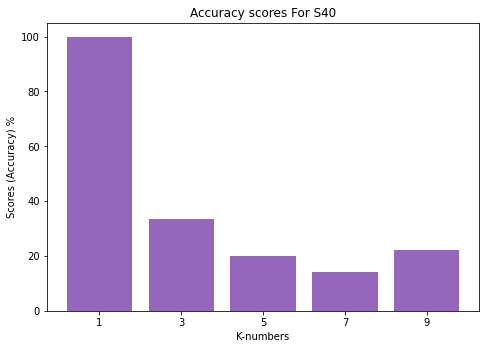

In [106]:
import random
def plot_data(data1,i):
    K=['1','3','5','7','9']
    colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd',
          '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']
    fig = plt.figure()
    ax = fig.add_axes([0,0,1,1])
    ax.set_ylabel('Scores (Accuracy) %')  
    ax.set_title(f'Accuracy scores For S{i+1}')
    ax.set_xlabel('K-numbers')
    return ax.bar(K,data1,color=random.choice(colors))

for i in range(0,len(result)):
    plot_data(result[i],i)
 